## ---------------------- Muhammad Hamid Khan ----------------
## ---------------------- Roll No: 24i-7352 -------------------
## ---------------------- Class: MS BA (2A) -------------------
## ------------------Assignment: SVM Application ---------------

# Customer Spending Analytics and Classification Exercise

## Background
You are a data analyst at a retail company. The management wants to understand customer spending patterns better to personalize marketing strategies. You have been provided with a sample dataset containing basic customer information and spending scores.

## Dataset
The dataset contains the following columns:
- CustomerID: Unique identifier for each customer
- Gender: Customer's gender (Male/Female)
- Age: Customer's age
- Annual Income (k$): Customer's annual income in thousands of dollars
- Spending Score (1-100): Score assigned by the company based on customer behavior and spending habits (higher = more spending)

Sample data:
```
CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40
6,Female,22,17,76
7,Female,35,18,6
```

## Exercise Tasks

### Task 1: Data Loading and Exploration
1. Load the dataset into a pandas DataFrame
2. Display basic information about the dataset (info(), describe(), etc.)
3. Check for missing values and duplicated entries
4. Display the first few rows of the dataset

### Task 2: Data Preprocessing
1. Create a copy of the DataFrame for preprocessing
2. Convert categorical variables (like Gender) to numerical values
3. Create age groups using pandas cut() function (e.g., 16-25, 26-35, etc.)
4. Create a new binary target variable 'High_Spender' based on Spending Score:
   - If Spending Score >= median value, classify as 1 (High Spender)
   - Otherwise, classify as 0 (Low Spender)
5. Create income brackets using the cut() function

### Task 3: Data Analysis with Indexing and Conditional Filtering
Perform at least 10 different data analysis tasks using:
1. Use iloc to select specific rows and columns
2. Use loc to select data based on labels
3. Filter customers by gender
4. Apply conditional filtering to find young customers (Age < 25) with Annual Income >= 16k
5. Calculate average spending score by gender using groupby()
6. Find top 3 customers by spending score
7. Identify female customers with Age > 20 and Spending Score > 50
8. Create a custom function to calculate spending efficiency (Spending Score / Income) and apply it
9. Sort data by multiple columns (Gender and Age)
10. Calculate cumulative spending score
11. Create a pivot table showing average spending score by gender and age group
12. Find the correlation between age, income, and spending score

### Task 4: Data Visualization
Create at least 6 different visualizations:
1. Plot the gender distribution using a count plot
2. Visualize the age distribution with a histogram and KDE
3. Create a histogram for spending score distribution
4. Create a scatter plot of Age vs. Spending Score, colored by Gender
5. Create a scatter plot of Annual Income vs. Spending Score, colored by Gender
6. Visualize High vs. Low spenders using a count plot
7. Create a correlation heatmap for numerical variables
8. Create a pairplot for key variables, colored by High_Spender
9. Create a box plot comparing spending scores by gender

### Task 5: Machine Learning - SVM Classification
1. Prepare features (X) and target variable (y)
   - X: Age, Annual Income, Gender (numeric)
   - y: High_Spender
2. Split the data into training and testing sets (70/30 split)
3. Scale the features using StandardScaler
4. Train SVM models with different kernels:
   - Linear kernel
   - Polynomial kernel
   - RBF kernel
   - Sigmoid kernel
5. Compare the performance of different kernels and identify the best one
6. Evaluate the best model using:
   - Confusion matrix
   - Classification report (precision, recall, F1-score)
7. Evaluate the tuned model on the test set

### Task 6: Business Insights and Recommendations
1. Generate insights from your analysis about high spenders vs. low spenders
2. Analyze the demographic characteristics of each group
3. Provide at least 5 actionable business recommendations based on your analysis



# Import necessary libraries

In [1643]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Loading the Dataset 

In [1645]:
data = pd.read_csv('customer_segmentation.csv')
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


### Dropping out 'CustomerID' column because its a unique identifier, just representing the customer at the index level. It does not have any numerical contribution to model train or even in prediction. 

In [1647]:
df = data.drop(['CustomerID'], axis=1)  

In [1648]:
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [1649]:
df.shape

(200, 4)

In [1650]:
df.columns

Index(['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)'], dtype='object')

## Task 1: Data Loading and Exploration

### 01: Load the dataset into a pandas DataFram

### The researcher used the downloaded dataset in CSV format which is already in the data frame. So, it does not require further exploration.  

### 02: Display basic information about the dataset (info(), describe(), etc.

#### .info()

In [1656]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Gender                  200 non-null    object
 1   Age                     200 non-null    int64 
 2   Annual Income (k$)      200 non-null    int64 
 3   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 6.4+ KB


#### .info() comprehensively displays the structure of the dataset. It includes the feature names, count of missing values, and datatype. Range index basically tells about the number of rows in the dataset.
#### Feature names as shown to you, neither column has a null value, and four and one column for datatype integer and object respectively. As far as concerned, the data dimension total five features with 200 entities. 

#### .describe()

In [1659]:
# For Numerical column
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,200.0,38.85,13.969007,18.0,28.75,36.0,49.0,70.0
Annual Income (k$),200.0,60.56,26.264721,15.0,41.50,61.5,78.0,137.0
Spending Score (1-100),200.0,50.20,25.823522,1.0,34.75,50.0,73.0,99.0


### Here are two critical observations the majority of the customers are above age 49 years and also, the majority of customers' monthly income is above 78k$/year based on the summary statistics. In addition,  38 years is the average age and 60k is the average income. 

In [1661]:
# For categorical column
df.describe(include = 'O').T

,count,unique,top,freq
Gender,200,2,Female,112


#### Out of the total 200, the majority of the 112 customers are female. 

### 03:Check for missing values and duplicated entries

In [1664]:
# .isnull().sum()
df.isnull().sum()

Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

#### These features have no missing values. It means that this dataset is clean but may require preprocessing.

In [1666]:
duplicate_counts = df.apply(lambda x: x.duplicated().sum())
print(duplicate_counts)

Gender                    198
Age                       149
Annual Income (k$)        136
Spending Score (1-100)    116
dtype: int64


#### In data analytics, dealing with duplicates remains confusing. Here, in the 'Gender' feature almost 198 values are duplicates of the total 200. Critically, we cannot call them duplicates because this situation must happen. we only have two genders, these have to be in a repetitive manner. Same for the Annual column because it has income slabs so repetition is by default. So, the same case for all the features in the dataset.   

### 04: Display the first few rows of the dataset

In [1669]:
# First 10 rows
df.head(10)

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40
5,Female,22,17,76
6,Female,35,18,6
7,Female,23,18,94
8,Male,64,19,3
9,Female,30,19,72


In [1670]:
# Last 10 Rows
df.tail(10)

,Gender,Age,Annual Income (k$),Spending Score (1-100)
190,Female,34,103,23
191,Female,32,103,69
192,Male,33,113,8
193,Female,38,113,91
194,Female,47,120,16
195,Female,35,120,79
196,Female,45,126,28
197,Male,32,126,74
198,Male,32,137,18
199,Male,30,137,83


# Task 2: Data Preprocessing

### 01: Create a copy of the DataFrame for preprocessing

In [1673]:
df1 = df.copy()

In [1674]:
df1.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


### 02: Convert categorical variables (like Gender) to numerical values

In [1676]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
df1['Gender'] = label_encoder.fit_transform(df['Gender'])

In [1677]:
df['Gender'].unique()

array(['Male', 'Female'], dtype=object)

### 03: Create age groups using pandas cut() function (e.g., 16-25, 26-35, etc.)

In [1679]:
df1.columns

Index(['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)'], dtype='object')

In [1680]:
df1['Age'].unique()

array([19, 21, 20, 23, 31, 22, 35, 64, 30, 67, 58, 24, 37, 52, 25, 46, 54,
       29, 45, 40, 60, 53, 18, 49, 42, 36, 65, 48, 50, 27, 33, 59, 47, 51,
       69, 70, 63, 43, 68, 32, 26, 57, 38, 55, 34, 66, 39, 44, 28, 56, 41],
      dtype=int64)

In [1681]:
df1.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40


In [1682]:
pd.cut(df1.Age, bins=4, right =False).head()

0    [18.0, 31.0)
1    [18.0, 31.0)
2    [18.0, 31.0)
3    [18.0, 31.0)
4    [31.0, 44.0)
Name: Age, dtype: category
Categories (4, interval[float64, left]): [[18.0, 31.0) < [31.0, 44.0) < [44.0, 57.0) < [57.0, 70.052)]

### The Below code is used to basically remove the decimal points from the age grouping. 

In [1684]:
labels = ['18_31', '31-44', '44-57', '57_70']
df1['Age_Groups'] = pd.cut(df1.Age, bins=4, labels=labels)

In [1685]:
df1.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),Age_Groups
0,1,19,15,39,18_31
1,1,21,15,81,18_31
2,0,20,16,6,18_31
3,0,23,16,77,18_31
4,0,31,17,40,18_31


### 04 Create a new binary target variable 'High_Spender' based on Spending Score:
#### If Spending Score >= median value, classify as 1 (High Spender)
#### Otherwise, classify as 0 (Low Spender)

In [1687]:
median = df1['Spending Score (1-100)'].median()
median

50.0

In [1688]:
spending = []
for score in df1['Spending Score (1-100)']:
    if score > median:
        spending.append(1)
    else:
        spending.append(0)

In [1689]:
df1['Spending_Class'] = spending

In [1690]:
df1.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),Age_Groups,Spending_Class
0,1,19,15,39,18_31,0
1,1,21,15,81,18_31,1
2,0,20,16,6,18_31,0
3,0,23,16,77,18_31,1
4,0,31,17,40,18_31,0


In [1691]:
# Renaming the columns to make computation easy. 

In [1692]:
df1.columns

Index(['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)',
       'Age_Groups', 'Spending_Class'],
      dtype='object')

### Renaming columns for easy Computation

In [1694]:
df1.rename(columns={'Annual Income (k$)': 'Annual_Income', 'Spending Score (1-100)': 'Spending_Score'}, inplace=True)
df1.columns

Index(['Gender', 'Age', 'Annual_Income', 'Spending_Score', 'Age_Groups',
       'Spending_Class'],
      dtype='object')

In [1695]:
df1.head(2)

,Gender,Age,Annual_Income,Spending_Score,Age_Groups,Spending_Class
0,1,19,15,39,18_31,0
1,1,21,15,81,18_31,1


### 05: Create income brackets using the cut() function

In [1697]:
An_Inc =df1['Annual_Income'].unique()

In [1698]:
print(list(set(An_Inc)))

[137, 15, 16, 17, 18, 19, 20, 21, 23, 24, 25, 28, 29, 30, 33, 34, 37, 38, 39, 40, 42, 43, 44, 46, 47, 48, 49, 50, 54, 57, 58, 59, 60, 61, 62, 63, 64, 65, 67, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 81, 85, 86, 87, 88, 93, 97, 98, 99, 101, 103, 113, 120, 126]


In [1699]:
df1['Annual_Income'].count()/40

5.0

In [1700]:
### Creating five income slabs of equal numbers of entries in each 

In [1701]:
quantiles = df1['Annual_Income'].quantile([0, 0.2, 0.4, 0.6, 0.8, 1]).values
df1['Income_Slabs'] = pd.cut(df1['Annual_Income'], bins=quantiles, include_lowest=True,labels=['Low', 'Medium', 'High', 'Very High', 'Ultra High'])

In [1702]:
print(df1['Income_Slabs'].value_counts())

Income_Slabs
Medium        46
Low           40
Ultra High    40
Very High     38
High          36
Name: count, dtype: int64


In [1703]:
df1.head()

,Gender,Age,Annual_Income,Spending_Score,Age_Groups,Spending_Class,Income_Slabs
0,1,19,15,39,18_31,0,Low
1,1,21,15,81,18_31,1,Low
2,0,20,16,6,18_31,0,Low
3,0,23,16,77,18_31,1,Low
4,0,31,17,40,18_31,0,Low


# Task 3: Data Analysis with Indexing and Conditional Filtering

### 01:Use iloc to select specific rows and columns

In [1706]:
df1.head(2)

,Gender,Age,Annual_Income,Spending_Score,Age_Groups,Spending_Class,Income_Slabs
0,1,19,15,39,18_31,0,Low
1,1,21,15,81,18_31,1,Low


In [1707]:
df1.iloc[1,4]

'18_31'

In [1708]:
df1.iloc[0:10,1:4]

,Age,Annual_Income,Spending_Score
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40
5,22,17,76
6,35,18,6
7,23,18,94
8,64,19,3
9,30,19,72


In [1709]:
df1.iloc[3]

Gender                0
Age                  23
Annual_Income        16
Spending_Score       77
Age_Groups        18_31
Spending_Class        1
Income_Slabs        Low
Name: 3, dtype: object

### 02: Use loc to select data based on labels

In [1711]:
df1.columns

Index(['Gender', 'Age', 'Annual_Income', 'Spending_Score', 'Age_Groups',
       'Spending_Class', 'Income_Slabs'],
      dtype='object')

In [1712]:
df1.loc[1:10,'Age':'Age_Groups']

,Age,Annual_Income,Spending_Score,Age_Groups
1,21,15,81,18_31
2,20,16,6,18_31
3,23,16,77,18_31
4,31,17,40,18_31
5,22,17,76,18_31
6,35,18,6,31-44
7,23,18,94,18_31
8,64,19,3,57_70
9,30,19,72,18_31
10,67,19,14,57_70


In [1713]:
df1.loc[180:201,['Spending_Score','Spending_Class']]

,Spending_Score,Spending_Class
180,32,0
181,86,1
182,15,0
183,88,1
184,39,0
185,97,1
186,24,0
187,68,1
188,17,0
189,85,1


In [1714]:
df1.loc[2,'Income_Slabs']

'Low'

### 03: Filter customers by gender

In [1716]:
df1['Gender'].unique() # Here 1 is for 'Male' and 0 is for 'Female'

array([1, 0])

In [1717]:
Female_Customer = df1[df1['Gender'] == 0]
Count_Female_Customer = Female_Customer['Gender'].count()
print(f'Total Female Customers are ',Count_Female_Customer)

Total Female Customers are  112


In [1718]:
Male_Customer = df1[df1['Gender'] == 1]
Count_Male_Customer = Male_Customer['Gender'].count()
print(f'Total Male Customers are ',Count_Male_Customer)

Total Male Customers are  88


### 04: Apply conditional filtering to find young customers (Age < 25) with Annual Income >= 16k

In [1720]:
df1.columns

Index(['Gender', 'Age', 'Annual_Income', 'Spending_Score', 'Age_Groups',
       'Spending_Class', 'Income_Slabs'],
      dtype='object')

In [1721]:
Young_Customer = df1[(df1['Age']<25) & (df1['Annual_Income'] >= 16)]
Young_Customer

,Gender,Age,Annual_Income,Spending_Score,Age_Groups,Spending_Class,Income_Slabs
2,0,20,16,6,18_31,0,Low
3,0,23,16,77,18_31,1,Low
5,0,22,17,76,18_31,1,Low
7,0,23,18,94,18_31,1,Low
13,0,24,20,77,18_31,1,Low
15,1,22,20,79,18_31,1,Low
17,1,20,21,66,18_31,1,Low
29,0,23,29,87,18_31,1,Low
31,0,21,30,73,18_31,1,Low
33,1,18,33,92,18_31,1,Low


In [1722]:
print(f'There are around {Young_Customer['Gender'].count()} customers that fulfil the given condition')

There are around 33 customers that fulfil the given condition


### 05: Calculate average spending score by gender using groupby()

In [1724]:
df1.columns

Index(['Gender', 'Age', 'Annual_Income', 'Spending_Score', 'Age_Groups',
       'Spending_Class', 'Income_Slabs'],
      dtype='object')

In [1725]:
Avg_Spending = df1.groupby('Gender')['Spending_Score'].mean()

In [1726]:
Avg_Spending

Gender
0    51.526786
1    48.511364
Name: Spending_Score, dtype: float64

#### These results show female average spendings (51.52) are higher than male average spendings (48.51).  

### 06: Find top 3 customers by spending score

In [1729]:
Top_03_Customer = df1.sort_values('Spending_Score', ascending=False).head(3)
Top_03_Customer

,Gender,Age,Annual_Income,Spending_Score,Age_Groups,Spending_Class,Income_Slabs
11,0,35,19,99,31-44,1,Low
19,0,35,23,98,31-44,1,Low
145,1,28,77,97,18_31,1,Very High


### 07: Identify female customers with Age > 20 and Spending Score > 50

In [1731]:
Female_Customer = df1[(df1['Age']>20) & (df1['Spending_Score'] > 50)]
Female_Customer

,Gender,Age,Annual_Income,Spending_Score,Age_Groups,Spending_Class,Income_Slabs
1,1,21,15,81,18_31,1,Low
3,0,23,16,77,18_31,1,Low
5,0,22,17,76,18_31,1,Low
7,0,23,18,94,18_31,1,Low
9,0,30,19,72,18_31,1,Low
...,...,...,...,...,...,...,...
191,0,32,103,69,31-44,1,Ultra High
193,0,38,113,91,31-44,1,Ultra High
195,0,35,120,79,31-44,1,Ultra High
197,1,32,126,74,31-44,1,Ultra High


In [1732]:
Female_Customer_Count = Female_Customer['Spending_Score'].count()
print(f'There are around {Female_Customer_Count} customers those Age is 20 plus and Spending Score is also more than 50.')

There are around 90 customers those Age is 20 plus and Spending Score is also more than 50.


### 08: Create a custom function to calculate spending efficiency (Spending Score / Income) and apply it

In [1734]:
df1.head(3)

,Gender,Age,Annual_Income,Spending_Score,Age_Groups,Spending_Class,Income_Slabs
0,1,19,15,39,18_31,0,Low
1,1,21,15,81,18_31,1,Low
2,0,20,16,6,18_31,0,Low


In [1735]:
s_s = 90
incm = 26

In [1736]:
def Spending_Efficiency(Spending_Score,Annual_Income):
    print(Spending_Score/Annual_Income)

In [1737]:
spending_efficiency = Spending_Efficiency(df1['Spending_Score'],df1['Annual_Income'])
spending_efficiency

0      2.600000
1      5.400000
2      0.375000
3      4.812500
4      2.352941
         ...   
195    0.658333
196    0.222222
197    0.587302
198    0.131387
199    0.605839
Length: 200, dtype: float64


### 09: Sort data by multiple columns (Gender and Age)

In [1739]:
column = ['Gender','Age']
print(column)

['Gender', 'Age']


In [1740]:
Sorted = df1.sort_values(column, ascending = (False,False))

In [1741]:
print(df1['Age'].max())

70


In [1742]:
Sorted.head(7)

,Gender,Age,Annual_Income,Spending_Score,Age_Groups,Spending_Class,Income_Slabs
60,1,70,46,56,57_70,1,Medium
70,1,70,49,55,57_70,1,Medium
57,1,69,44,46,57_70,0,Medium
108,1,68,63,43,57_70,0,High
10,1,67,19,14,57_70,0,Low
82,1,67,54,41,57_70,0,Medium
102,1,67,62,59,57_70,1,High


#### It is easily visible that the Gender and Age columns are correctly sorted.

### 10: Calculate cumulative spending score

In [1745]:
df1.head(7)

,Gender,Age,Annual_Income,Spending_Score,Age_Groups,Spending_Class,Income_Slabs
0,1,19,15,39,18_31,0,Low
1,1,21,15,81,18_31,1,Low
2,0,20,16,6,18_31,0,Low
3,0,23,16,77,18_31,1,Low
4,0,31,17,40,18_31,0,Low
5,0,22,17,76,18_31,1,Low
6,0,35,18,6,31-44,0,Low


#### Here, logically cumulative sum can easily be applied to the following columns  
#### 1: Age	-------------- 2: Annual_Income -------------- 3:Spending_Score	


In [1747]:
Cumulative_Age = df1['Age'].cumsum()
print(Cumulative_Age) 
print(df1['Age'])


0        19
1        40
2        60
3        83
4       114
       ... 
195    7631
196    7676
197    7708
198    7740
199    7770
Name: Age, Length: 200, dtype: int64
0      19
1      21
2      20
3      23
4      31
       ..
195    35
196    45
197    32
198    32
199    30
Name: Age, Length: 200, dtype: int64


### 11: Create a pivot table showing average spending score by gender and age group

In [1749]:
df1.head(3)

,Gender,Age,Annual_Income,Spending_Score,Age_Groups,Spending_Class,Income_Slabs
0,1,19,15,39,18_31,0,Low
1,1,21,15,81,18_31,1,Low
2,0,20,16,6,18_31,0,Low


In [1750]:
df1.pivot_table(values="Spending_Score", index="Gender", columns="Age_Groups", aggfunc="mean", observed=False)

Age_Groups,18_31,31-44,44-57,57_70
Gender,,,,
0,62.707317,51.970588,36.785714,44.777778
1,59.448276,51.629630,35.466667,36.411765


#### The above pivot table explains that the female average score (62.71) is higher for the age group 18_31. It is also higher for males as well, but less for females' average spending score. In addition, female(36.78) and male(35.46) minimal average score for the same age group which is 44-57.

### 12: Find the correlation between age, income, and spending score

In [1753]:
df1.columns

Index(['Gender', 'Age', 'Annual_Income', 'Spending_Score', 'Age_Groups',
       'Spending_Class', 'Income_Slabs'],
      dtype='object')

In [1754]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   Gender          200 non-null    int32   
 1   Age             200 non-null    int64   
 2   Annual_Income   200 non-null    int64   
 3   Spending_Score  200 non-null    int64   
 4   Age_Groups      200 non-null    category
 5   Spending_Class  200 non-null    int64   
 6   Income_Slabs    200 non-null    category
dtypes: category(2), int32(1), int64(4)
memory usage: 8.0 KB


In [1755]:
matrix = df1[['Age','Annual_Income','Spending_Score']].corr()

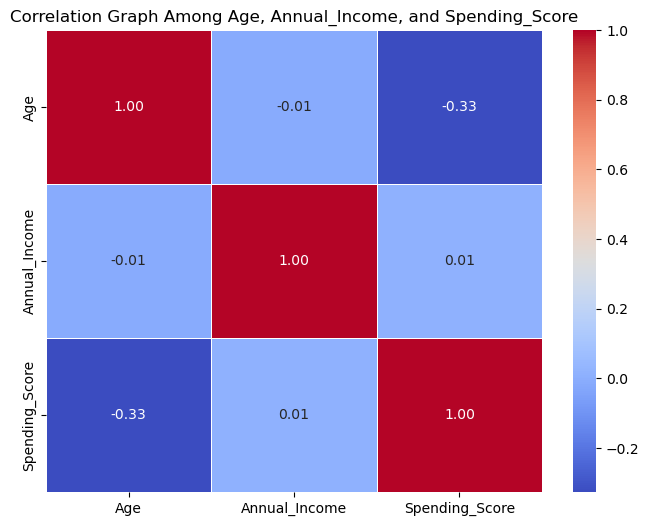

In [1756]:
plt.figure(figsize=(8,6))
sns.heatmap(matrix,annot=True,cmap='coolwarm',fmt='.2f',linewidths=0.5)
plt.title("Correlation Graph Among Age, Annual_Income, and Spending_Score")
plt.show()

# Task 4: Data Visualization

### 01: Plot the gender distribution using a count plot

<Axes: xlabel='Gender', ylabel='count'>

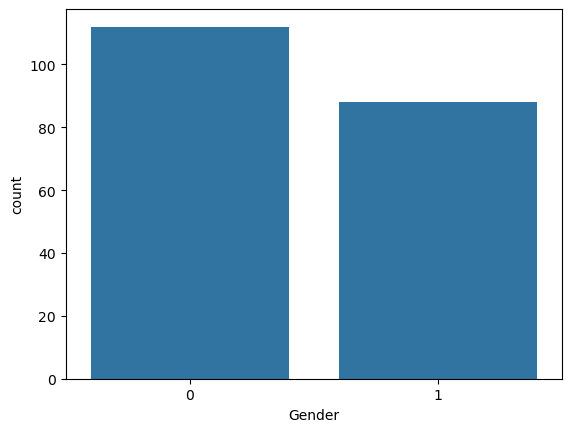

In [1759]:
sns.countplot(df1, x="Gender")

### 02: Visualize the age distribution with a histogram and KDE

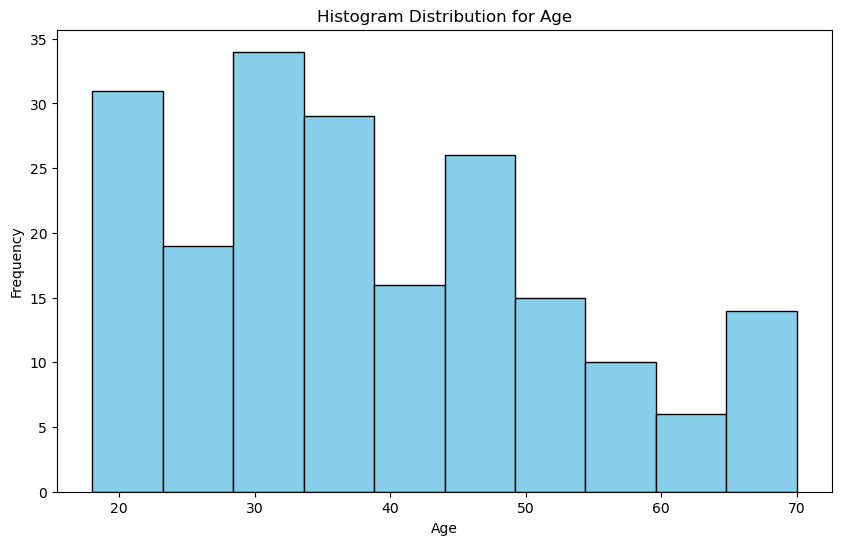

In [1761]:
# Plotting a histogram
plt.figure(figsize=(10, 6))
plt.hist(df1['Age'], bins=10, color='skyblue', edgecolor='black')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Histogram Distribution for Age')
plt.show()

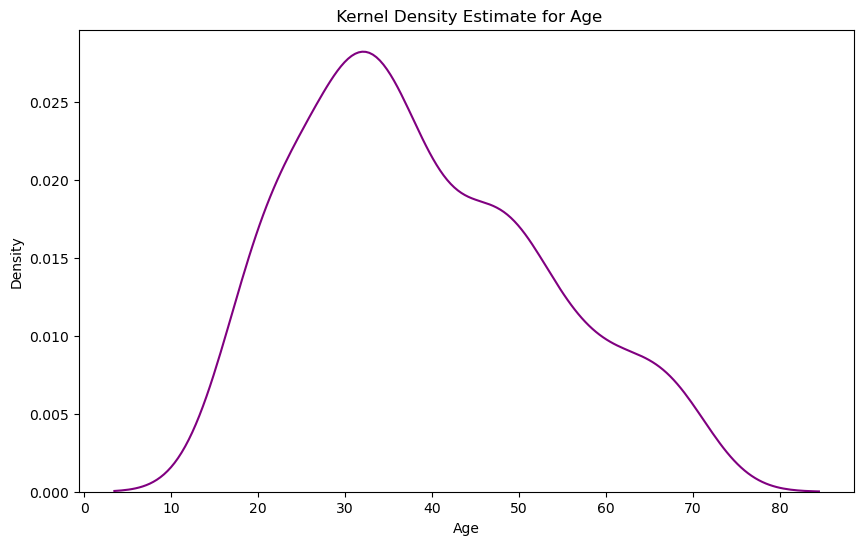

In [1762]:
# Plotting a  Kernel Density Estimate (KDE)
plt.figure(figsize=(10, 6))
sns.kdeplot(df1['Age'],color='purple')
plt.xlabel('Age')
plt.ylabel('Density')
plt.title(' Kernel Density Estimate for Age')
plt.show()

### 03:Create a histogram for spending score distribution

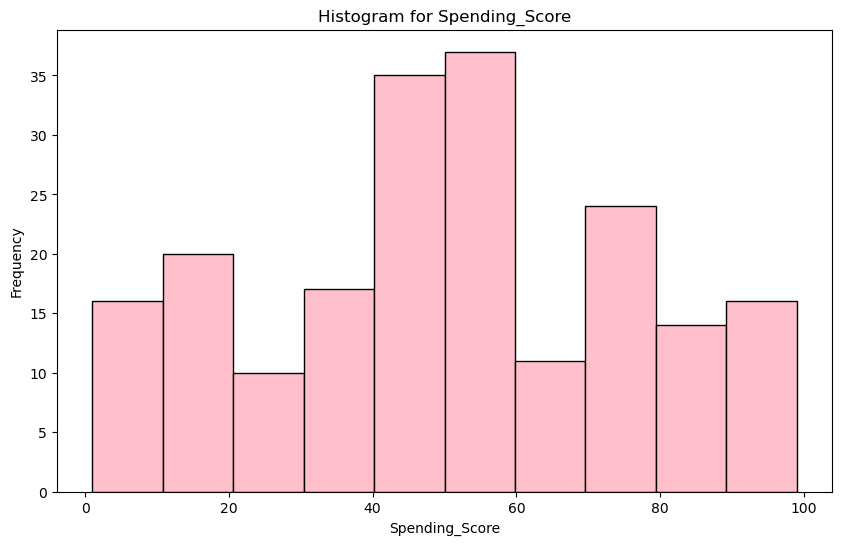

In [1764]:
# Plotting a histogram
plt.figure(figsize=(10, 6))
plt.hist(df1['Spending_Score'], color='pink', edgecolor='black')
plt.xlabel('Spending_Score')
plt.ylabel('Frequency')
plt.title('Histogram for Spending_Score')
plt.show()

### 04: Create a scatter plot of Age vs. Spending Score, colored by Gender

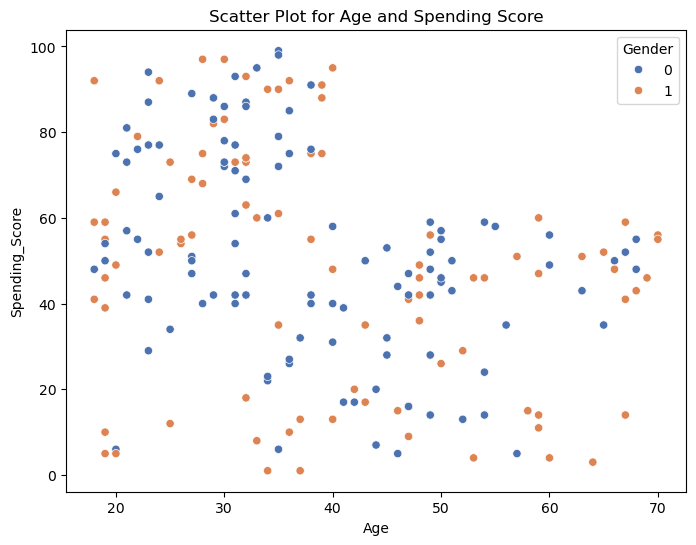

In [1766]:
plt.figure(figsize = (8,6))
sns.scatterplot(data=df1, x = 'Age', y='Spending_Score', hue= 'Gender', palette='deep')
plt.xlabel('Age')
plt.ylabel('Spending_Score')
plt.title('Scatter Plot for Age and Spending Score')
plt.show()

### 05: Create a scatter plot of Annual Income vs. Spending Score, colored by Gender

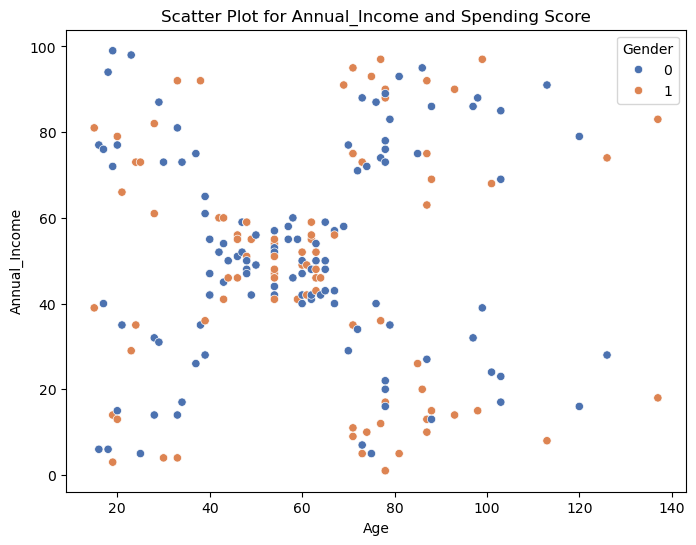

In [1768]:
plt.figure(figsize = (8,6))
sns.scatterplot(data=df1, x = 'Annual_Income', y='Spending_Score', hue= 'Gender', palette='deep')
plt.xlabel('Age')
plt.ylabel('Annual_Income')
plt.title('Scatter Plot for Annual_Income and Spending Score')
plt.show()

### 06: Visualize High vs. Low spenders using a count plot

In [1770]:
df1.head(3)

,Gender,Age,Annual_Income,Spending_Score,Age_Groups,Spending_Class,Income_Slabs
0,1,19,15,39,18_31,0,Low
1,1,21,15,81,18_31,1,Low
2,0,20,16,6,18_31,0,Low


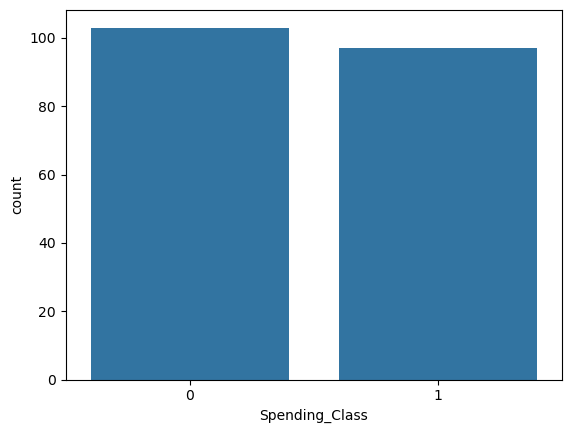

In [1771]:
sns.countplot(df1, x="Spending_Class")
plt.show()

### 7: Create a correlation heatmap for numerical variables

In [1773]:
df1.head()

,Gender,Age,Annual_Income,Spending_Score,Age_Groups,Spending_Class,Income_Slabs
0,1,19,15,39,18_31,0,Low
1,1,21,15,81,18_31,1,Low
2,0,20,16,6,18_31,0,Low
3,0,23,16,77,18_31,1,Low
4,0,31,17,40,18_31,0,Low


In [1774]:
matrix = df1.drop(columns=['Income_Slabs','Age_Groups'])
matrix.columns

Index(['Gender', 'Age', 'Annual_Income', 'Spending_Score', 'Spending_Class'], dtype='object')

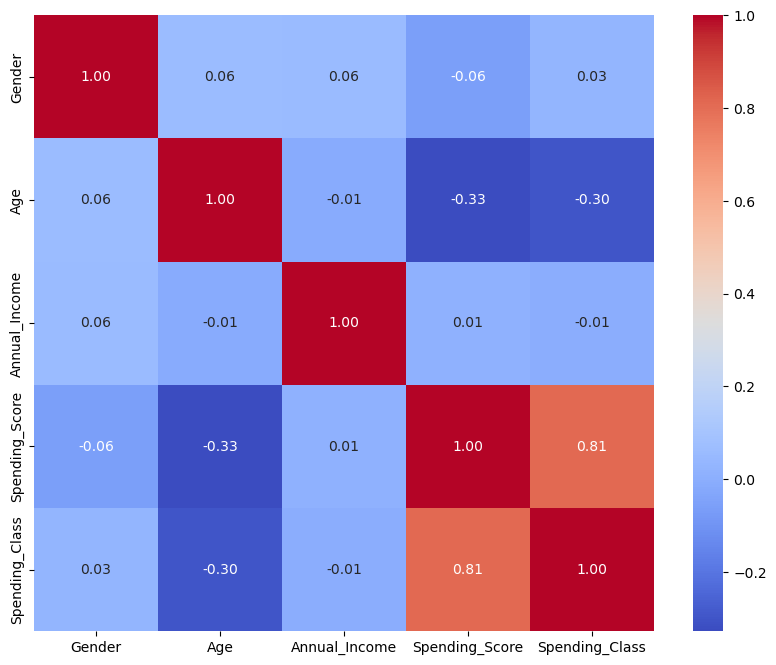

In [1775]:
coorelation_matrix = matrix.corr()

plt.figure(figsize = (10,8))
sns.heatmap(coorelation_matrix, cmap = 'coolwarm',annot=True, fmt=".2f", cbar=True)
plt.show()

### 08: Create a pairplot for key variables, colored by High_Spender

In [1777]:
df1.head()

,Gender,Age,Annual_Income,Spending_Score,Age_Groups,Spending_Class,Income_Slabs
0,1,19,15,39,18_31,0,Low
1,1,21,15,81,18_31,1,Low
2,0,20,16,6,18_31,0,Low
3,0,23,16,77,18_31,1,Low
4,0,31,17,40,18_31,0,Low


#### Converting the Spending class numerical variable into categorical, Because for the color bases on Spending Class needs to be in a categorical format not in numerical 

In [1897]:
df1.columns

Index(['Gender', 'Age', 'Annual_Income', 'Spending_Score', 'Age_Groups',
       'Spending_Class', 'Income_Slabs'],
      dtype='object')

In [1899]:
cat_column = df1.drop(columns = ['Gender', 'Age', 'Annual_Income', 'Spending_Score', 'Age_Groups','Income_Slabs'])
cat_column.columns                              

Index(['Spending_Class'], dtype='object')

In [1901]:
pairplot_column = df1.drop(columns = ['Gender', 'Age', 'Age_Groups', 'Spending_Class', 'Income_Slabs'])

In [1903]:
pairplot_column.columns

Index(['Annual_Income', 'Spending_Score'], dtype='object')

In [1905]:
pairplot_column.head(3)

,Annual_Income,Spending_Score
0,15,39
1,15,81
2,16,6


In [1907]:
df1['Spending_Class_Label'] = df1['Spending_Class'].map({1: 'High_Spend', 0: 'Low_Spend'})

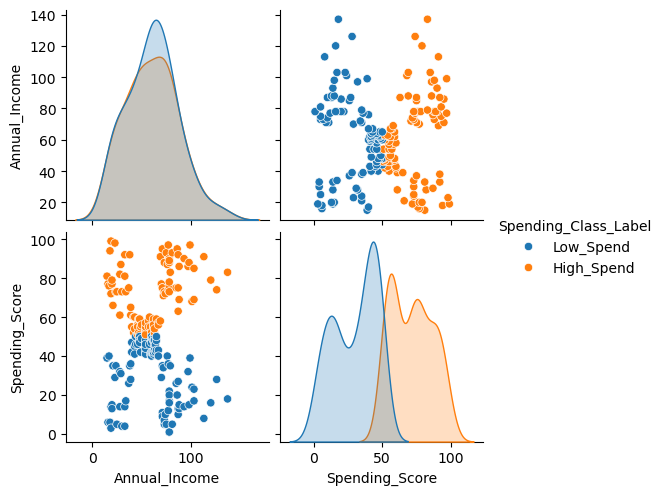

In [1911]:
sns.pairplot(df1, hue='Spending_Class_Label' , vars=pairplot_column)
plt.show()

### 09: Create a box plot comparing spending scores by gender

In [1914]:
df1.head(2)

,Gender,Age,Annual_Income,Spending_Score,Age_Groups,Spending_Class,Income_Slabs,Spending_Class_Label
0,1,19,15,39,18_31,0,Low,Low_Spend
1,1,21,15,81,18_31,1,Low,High_Spend


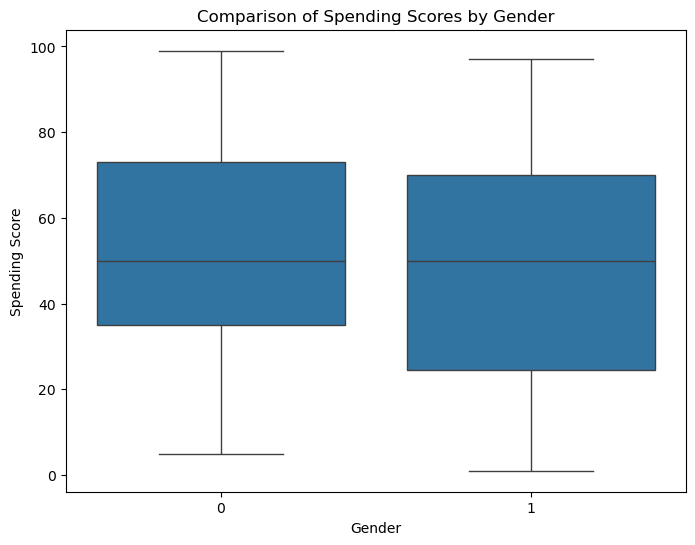

In [1922]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Gender', y='Spending_Score', data=df1)
plt.title('Comparison of Spending Scores by Gender')
plt.xlabel('Gender')
plt.ylabel('Spending Score')
plt.show()

#  Task 5: Machine Learning - SVM Classification

In [1986]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [1948]:
df1.head(3)

,Gender,Age,Annual_Income,Spending_Score,Age_Groups,Spending_Class,Income_Slabs,Spending_Class_Label
0,1,19,15,39,18_31,0,Low,Low_Spend
1,1,21,15,81,18_31,1,Low,High_Spend
2,0,20,16,6,18_31,0,Low,Low_Spend


### 01: Prepare features (X) and target variable (y)
#### X features are Age, Annual Income, Gender (numeric), and Y feature is  High_Spender

## Importing Some  Necessary Libraries

In [2101]:
X = df1[['Gender','Age','Annual_Income','Spending_Score']]
X.columns

Index(['Gender', 'Age', 'Annual_Income', 'Spending_Score'], dtype='object')

In [2103]:
Y = df1[['Spending_Class']]
Y.columns

Index(['Spending_Class'], dtype='object')

### 02: Split the data into training and testing sets (70/30 split)

In [2106]:
x_train,x_test,y_train,y_test = train_test_split(X,Y, test_size = 0.3, random_state = 42)

In [2108]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(140, 4)
(60, 4)
(140, 1)
(60, 1)


### 03: Scale the features using StandardScaler

In [2111]:
X.head(2)

,Gender,Age,Annual_Income,Spending_Score
0,1,19,15,39
1,1,21,15,81


In [2113]:
scaler = StandardScaler()
scaler

StandardScaler()

In [2115]:
print(scaler.fit(X))

StandardScaler()


In [2117]:
scaler.transform(X)

array([[ 1.12815215, -1.42456879, -1.73899919, -0.43480148],
       [ 1.12815215, -1.28103541, -1.73899919,  1.19570407],
       [-0.88640526, -1.3528021 , -1.70082976, -1.71591298],
       [-0.88640526, -1.13750203, -1.70082976,  1.04041783],
       [-0.88640526, -0.56336851, -1.66266033, -0.39597992],
       [-0.88640526, -1.20926872, -1.66266033,  1.00159627],
       [-0.88640526, -0.27630176, -1.62449091, -1.71591298],
       [-0.88640526, -1.13750203, -1.62449091,  1.70038436],
       [ 1.12815215,  1.80493225, -1.58632148, -1.83237767],
       [-0.88640526, -0.6351352 , -1.58632148,  0.84631002],
       [ 1.12815215,  2.02023231, -1.58632148, -1.4053405 ],
       [-0.88640526, -0.27630176, -1.58632148,  1.89449216],
       [-0.88640526,  1.37433211, -1.54815205, -1.36651894],
       [-0.88640526, -1.06573534, -1.54815205,  1.04041783],
       [ 1.12815215, -0.13276838, -1.54815205, -1.44416206],
       [ 1.12815215, -1.20926872, -1.54815205,  1.11806095],
       [-0.88640526, -0.

### 04: Train SVM models with different kernels:
#### Linear kernel
#### Polynomial kernel
#### RBF kernel
#### Sigmoid kerne

### Applying Linear Kernel

In [2120]:
print(x_train.shape)
print(y_train.shape)

(140, 4)
(140, 1)


In [2130]:
model_linear = SVC(kernel='linear')
model_linear.fit(x_train, y_train)
y_pred_linear = model_linear.predict(x_test)

### Applying Polynomial Kernel

In [2132]:
model_poly = SVC(kernel='poly')
model_poly.fit(x_train, y_train)
y_pred_poly = model_poly.predict(x_test)

### Applying RBF Kernel

In [2134]:
model_rbf = SVC(kernel='rbf')
model_rbf.fit(x_train, y_train)
y_pred_rbf = model_rbf.predict(x_test)

### Applying Sigmoid Kernel

In [2136]:
model_sigmoid = SVC(kernel='sigmoid')
model_sigmoid.fit(x_train, y_train)
y_pred_sigmoid = model_sigmoid.predict(x_test)

## Checking Model Accuracy Scores 

In [2138]:
accuracy_Linear = accuracy_score(y_test, y_pred_linear)
accuracy_Linear

0.9833333333333333

In [2140]:
accuracy_poly = accuracy_score(y_test, y_pred_poly)
accuracy_poly

0.9833333333333333

In [2142]:
accuracy_rbf = accuracy_score(y_test, y_pred_rbf)
accuracy_rbf

1.0

In [2144]:
accuracy_sigmoid = accuracy_score(y_test, y_pred_sigmoid)
accuracy_sigmoid

0.5333333333333333

### 05: Compare the performance of different kernels and identify the best one

### Model performed very well on Linear, Polynomial, and RBF but its accuracy is low on sigmoid. Model performance is against the normal scenarios. In business cases, usually, accuracy in-between 85 and 90 is considered well. But here, in this case, it is around 98 for linear and poly and 100 percent for RBF. I think it is due to various reasons, dataset is small, features are less in number, and many more. 

### 06: Evaluate the best model using:
#### Confusion matrix
#### Classification report (precision, recall, F1-score)

# Linear 

## Confusion Matrix

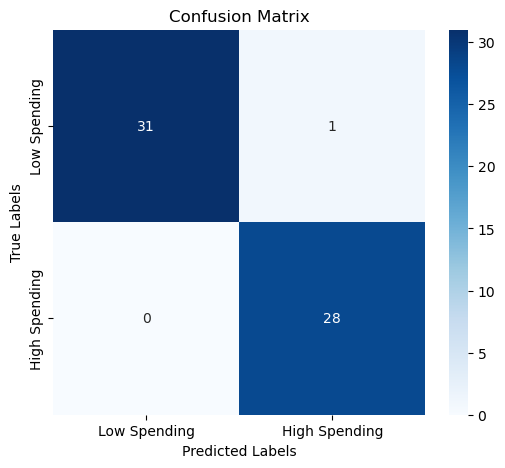

In [2180]:
cm = confusion_matrix(y_test, y_pred_linear)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', xticklabels=['Low Spending', 'High Spending'], yticklabels=['Low Spending', 'High Spending'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

## Classification Report

In [2184]:
print(classification_report(y_test, y_pred_linear))

              precision    recall  f1-score   support

           0       1.00      0.97      0.98        32
           1       0.97      1.00      0.98        28

    accuracy                           0.98        60
   macro avg       0.98      0.98      0.98        60
weighted avg       0.98      0.98      0.98        60



# Poynomial

## Confusion Matrix

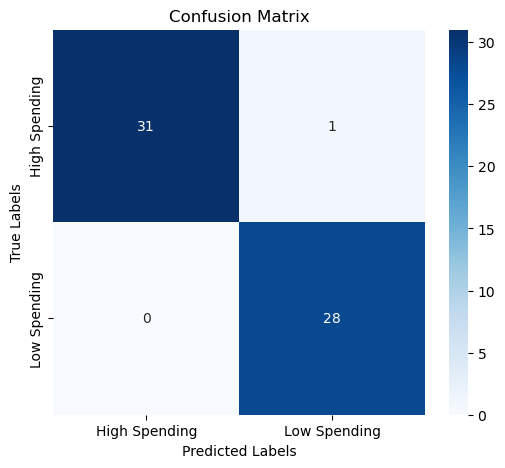

In [2220]:
cm = confusion_matrix(y_test, y_pred_poly)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', xticklabels=['High Spending', 'Low Spending'], yticklabels=['High Spending', 'Low Spending'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

## Classification Report

In [2200]:
print(classification_report(y_test, y_pred_poly))

              precision    recall  f1-score   support

           0       1.00      0.97      0.98        32
           1       0.97      1.00      0.98        28

    accuracy                           0.98        60
   macro avg       0.98      0.98      0.98        60
weighted avg       0.98      0.98      0.98        60



# RBF 

## Confusion Matrix

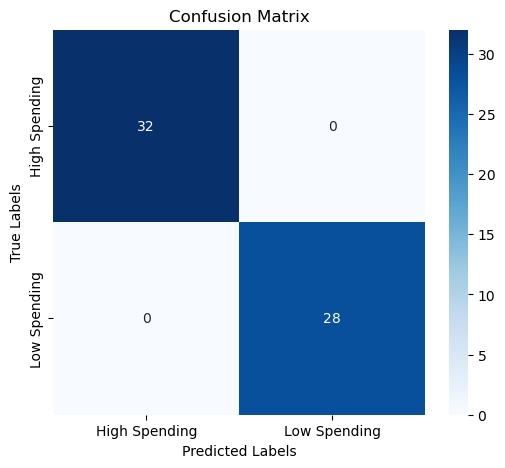

In [2222]:
cm = confusion_matrix(y_test, y_pred_rbf)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', xticklabels=['High Spending', 'Low Spending'], yticklabels=['High Spending', 'Low Spending'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

## Classification Report

In [2206]:
print(classification_report(y_test, y_pred_rbf))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        32
           1       1.00      1.00      1.00        28

    accuracy                           1.00        60
   macro avg       1.00      1.00      1.00        60
weighted avg       1.00      1.00      1.00        60



# Sigmoid 

## Confusion Matrix

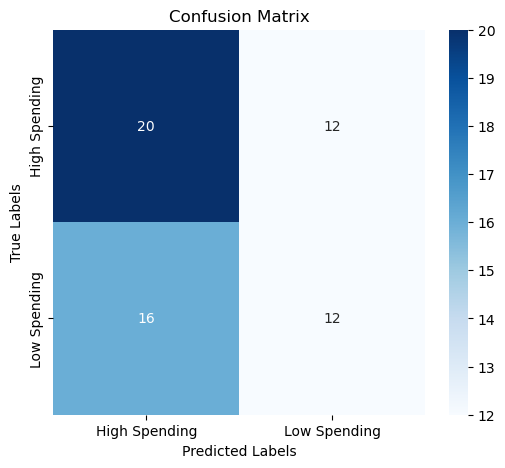

In [2224]:
cm = confusion_matrix(y_test, y_pred_sigmoid)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', xticklabels=['High Spending', 'Low Spending'], yticklabels=['High Spending', 'Low Spending'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

## Confusion Matrix

In [2210]:
print(classification_report(y_test, y_pred_sigmoid))

              precision    recall  f1-score   support

           0       0.56      0.62      0.59        32
           1       0.50      0.43      0.46        28

    accuracy                           0.53        60
   macro avg       0.53      0.53      0.52        60
weighted avg       0.53      0.53      0.53        60



### 07: Evaluate the tuned model on the test set

#### This model did not require tuning because it's already performing very well. Hypothetically, we can say the model might overfitting. Because number of features and entities are less in number. 

# Task 6: Business Insights and Recommendations

### 01: Generate insights from your analysis about high spenders vs. low spenders

#### 01: Linear and Polynomial Kernels (98% accuracy): Both did well, capturing the patterns in the data effectively.
#### 02: RBF Kernel (100% accuracy): This kernel performed perfectly, handling complex relationships between features.
#### 03:  Sigmoid Kernel (58% accuracy): The sigmoid kernel struggled, leading to many misclassifications
 



### 02: Analyze the demographic characteristics of each group

In [2227]:
df1['Gender'].value_counts()

Gender
0    112
1     88
Name: count, dtype: int64

### In Gender base analysis, high spenders may show a higher concentration in one gender. Like women might spend more on certain product categories or services.
### Considering its implication gender-based patterns could reveal preferences in shopping habits or brand loyalty, helping create targeted marketing campaigns.

### Age factor is also detrimental to high spending because individuals have high earning potential so directly high disposable income. 
### Age-tailored  offers for middle-aged customers and discount offers for young customers

### High spenders typically have a higher annual income, which enables them to make larger purchases more frequently.
### Customer will have a larger spending score will large number of transactions

### 03: Provide at least 5 actionable business recommendations based on your analysis

#### Targeted Marketing Campaigns: Focus on age and income demographics to create personalized marketing campaigns. High-income groups can be targeted with premium offers, while low-income groups need budget-friendly options.

#### Loyalty Programs for High Spenders: In addition to special offers, develop loyalty programs that reward high spenders with exclusive deals, encouraging repeat purchases and fostering customer loyalty.

#### Tailored Discounts: Offer personalized discounts based on spending behavior. For example, provide higher discounts to low spenders to boost their purchase frequency and spending habits.

#### Segmentation Based on Gender: In summary, analyze gender-specific purchasing trends to tailor product offerings, ensuring they resonate with the preferences of each gender group.

#### Dynamic Pricing Strategy: For high-income customers, implement dynamic pricing strategies that offer exclusive, premium products. For low-income customers, offer more affordable, value-driven products.

#### Improve Customer Engagement: In addition, invest in customer engagement strategies such as personalized emails, retargeting ads, and reward systems to enhance the shopping experience and customer retention.

#### Monitor Spending Patterns Regularly: Continuously track changes in spending scores and income demographics to adapt your offerings, ensuring they remain relevant to the evolving preferences of each group.